
# Exploratory Data Analysis Notebook #2 (Intermediate)

This notebook is 2/2 of exploratory data analysis done for [An all-out test to determine finger flexor critical force in rock climbers by Giles et al](https://www.researchgate.net/publication/343601001_An_all-out_test_to_determine_finger_flexor_critical_force_in_rock_climbers)

For our Intermediate analysis, we'll go a little further in depth within this paper, visually representing some of the main points and some of the points we're interested in figuring out from the data; namely climbing peak force vs grade, critical force in terms of body mass and peak force against grade, and how CF (the isometric version) of CP (isotonic, forearm and shoulder engagement) is measured against work capacity (W')

If you're looking to also graph some points for your own inferences, feel free to utilize **Interactive_Database.ipynb** and choose your own X and Y axis' using the dropdown widget.


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import df_cleaning

from df_cleaning import percentage_fix

The module df_cleaning will once again clean data and drop all columns which contain NaN values in all their cells for both column and rows.

We also want to convert all the percentages (PEAK FORCE % BODY MASS, CF % PEAK FORCE, CF % BODYMASS) into decimals to allow us to graph them, using percentage_fix. 

In [5]:
dataframe = df_cleaning.clean('Climbing Critical Force Data - Giles et al 2020.csv')
#drops NA values

percentage_fix(dataframe)
#Converting the %'s in the dataframe into floats, for chart readability


In [6]:
dataframe.head()

,#,SEX,AGE (YRS),HEIGHT (CM),BODY MASS (KG),YRS CLIMBING,CLIMB HRS WEEK,TRAIN HRS WEEK,SPORT GRADE IRCRA,BOULDER GRADE IRCRA,# REPS,PEAK FORCE (KG),PEAK FORCE % BODY MASS,CF (KG),CF % PEAK FORCE,CF % BODY MASS,40% MVC (KG),W' (KG),W' PER KG BODY MASS
0,0.0,Female,38.0,164.0,56.5,10.0,3.0,0.0,NaN,19.0,24.0,33.28,0.589,12.85,0.386,0.227,9.98,579.31,10.25
1,1.0,Female,28.0,157.5,56.1,13.0,14.0,4.0,NaN,21.5,24.0,42.01,0.749,13.52,0.322,0.241,16.80,1088.38,19.40
2,2.0,Female,26.0,159.0,51.8,2.0,5.0,0.8,NaN,17.0,24.0,39.73,0.767,11.08,0.279,0.214,15.89,884.00,17.06
3,3.0,Female,26.0,169.0,56.3,8.0,6.0,2.0,15.0,19.0,24.0,33.31,0.592,7.84,0.235,0.139,13.32,463.40,8.23
4,4.0,Female,22.0,173.5,71.8,8.0,9.0,2.0,NaN,20.5,24.0,50.55,0.704,16.84,0.333,0.235,20.22,968.50,13.49


## Further Grade Breakdowns

I thought it'd be interesting to convert the IRCRA grades to scales that me and many other North American based climbers would be more familiar with; mainly the V-Scale for bouldering and the Yosemite Decimal System for Sport/Roped Climbing. 

I utilized data from [Comparative grading scales, statistical analyses, climber descriptors and ability
grouping: International Rock Climbing Research Association Position Statement](https://core.ac.uk/download/pdf/77059908.pdf) and based my measurements off of their analysis.

### Converting IRCRA bouldering grades into V-scale.

Following their IRCRA reporting and Vermin Scale (V-Scale) reporting, I binned the IRCRA grades into V grades, and did an overall count to report the numbers. 


In [7]:
v_bins = [16,17,18,19,20,22,23,24,27]
v_bin_labels = ['V2','V3','V4','V5','V6','V7','V8','V9+']

In [8]:
v_bin = pd.cut(dataframe['BOULDER GRADE IRCRA'],bins=v_bins,labels = v_bin_labels).value_counts().sort_index(ascending=False).to_frame()
v_bin.sort_index(ascending=True)

,BOULDER GRADE IRCRA
V2,8
V3,4
V4,14
V5,12
V6,21
V7,5
V8,1
V9+,7



It seems like the majority of our climbers are within the v4-v6 range!

Text(0, 0.5, 'V scale')

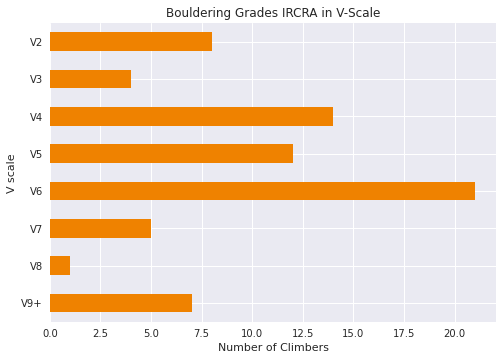

In [28]:
v_bin.plot(kind='barh',color='#EF8200',legend=False)
plt.style.use('seaborn') 
plt.title('Bouldering Grades IRCRA in V-Scale')
plt.xlabel('Number of Climbers')
plt.ylabel('V scale')

## Converting IRCRA sport grades into Yosemite Decimal Systems Scale

Same technique as stated above, this time for measuring sport grade counts. 
There was a large amount of climbers primarily in the 5.11a-5.12d ranges, so I further divided these columns to improve readability.


In [10]:
y_bins = [12,14,15.5,17,19.5,22,25,26,29]
y_bin_labels = ['5.10c-5.10d','5.11a-5.11b','5.11b-5.11d','5.12a-5.12b','5.12b-5.12d','5.13a-5.13d','5.14a-5.14d','5.14+']

In [11]:
y_bin = pd.cut(dataframe['SPORT GRADE IRCRA'],bins=y_bins,labels=y_bin_labels).value_counts().sort_index(ascending=False)
y_bin.sort_index(ascending=True)
# bins=v_bins,labels = v_bin_labels).value_counts().sort_index(ascending=False).to_frame()

5.10c-5.10d     3
5.11a-5.11b     5
5.11b-5.11d    24
5.12a-5.12b    13
5.12b-5.12d    24
5.13a-5.13d     8
5.14a-5.14d     1
5.14+           2
Name: SPORT GRADE IRCRA, dtype: int64

76% of our climbers are located within the 5'11a-5'12d range! 

Text(0, 0.5, 'Yosemite Decimal scale')

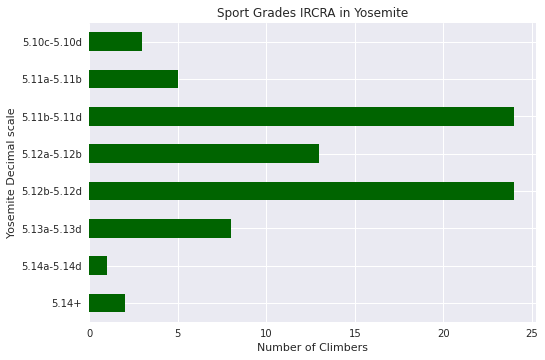

In [12]:
y_bin.plot(kind='barh',color='darkgreen',legend=False)
plt.style.use('seaborn') 
plt.title('Sport Grades IRCRA in Yosemite')
plt.xlabel('Number of Climbers')
plt.ylabel('Yosemite Decimal scale')

## Training Hours per Week vs Climbing Grade (Sport, Bouldering)

Ah, the age old question of if more training makes you a better climber; and we are members of the team behind 'climbing fun, training bad.' Unfortunately the graph does show that the majority of the climbers who climb above 24 (v8+) for bouldering do end up training more than three hours weekly. 

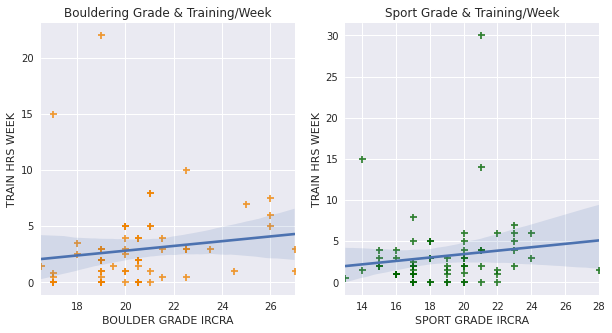

In [36]:
# Subplot our graphs, to have bouldering and sport side by side.
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10 , 5),)

# Use the function regplot to make a scatterplot for Bouldering Grades
ax1 = sns.regplot(ax= ax1,x=dataframe["BOULDER GRADE IRCRA"], y=dataframe["TRAIN HRS WEEK"], marker='+', scatter_kws={"color":'#EF8200'})
ax1.title.set_text('Bouldering Grade & Training/Week')

# Use the function regplot to make a scatterplot for Sport Grades
ax2 = sns.regplot(ax= ax2, x=dataframe["SPORT GRADE IRCRA"], y=dataframe["TRAIN HRS WEEK"], marker='+', scatter_kws={"color":"darkgreen"})
ax2.title.set_text('Sport Grade & Training/Week')



## Peak Force and Climbing Grade

As we are of the camp that technique can compensate for some strength, this was one of the more interesting relationships we wanted to further look into; does the "pull hard don't let go" motto have any significance in our data? 


Kind of? In our bouldering boxplots, the medians steadily increased as we got further up in grades aside from a couple of outliers (what happened 21.5?) So we can draw some relationship in determining how much of an effect there is between the two!

In terms of Sport Grade however, it seemed to be very steady across the board, with the medians jumping by leaps of 5 or less. It's a relatively interesting and pretty understandable difference between the two; sport being more of a stamina and long term focused climbing discipline vs the short impact and very power dependant discipline that is bouldering!



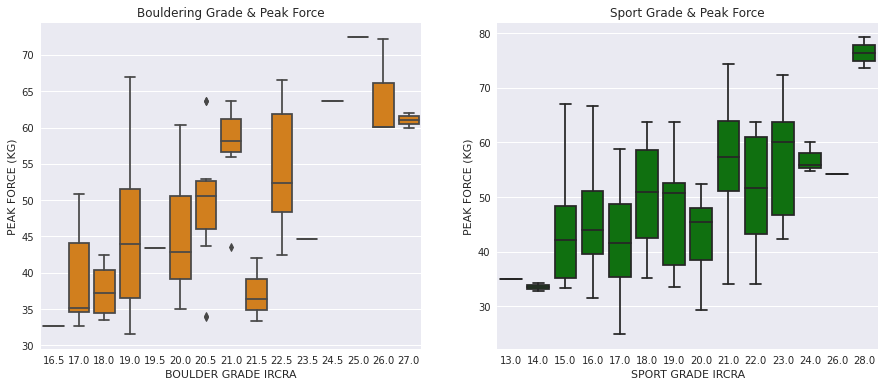

In [30]:
fig, (ax3,ax4) = plt.subplots(1, 2, figsize=(15 , 6))

ax3= sns.boxplot(ax = ax3, data = dataframe, x="BOULDER GRADE IRCRA", y="PEAK FORCE (KG)", color='#EF8200')
ax3.title.set_text('Bouldering Grade & Peak Force')

ax4= sns.boxplot(ax = ax4, data = dataframe, x="SPORT GRADE IRCRA", y="PEAK FORCE (KG)", color='green')
ax4.title.set_text('Sport Grade & Peak Force')


## Critical Force and Climbing Grade

Critical Force is the centerpiece and main focal point of this research. It's defined as the amount of time that our subjects can hang off a 20mm edge in a half crimp (think right angle with your fingers with your thumbs tucked in) for a period of four minutes following a 7:3 work-to-rest ratio (7 seconds hang, 3 second rest)

In more layman's terms, it's viewed as a trainable measure of endurance for your finger flexors and is viewed as a key factor in climbing performance.
 The purpose of this experiment was to demonstrate a replicateable measurement for CF, through this 7:3 work rest exercise. 


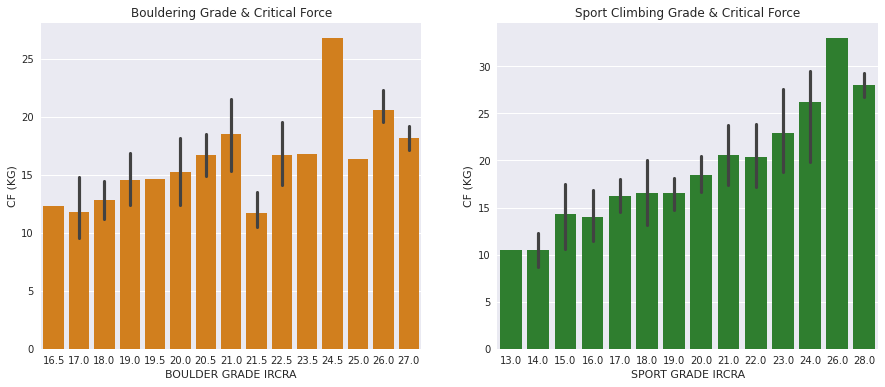

In [31]:
fig, (ax5,ax6) = plt.subplots(1, 2, figsize=(15 , 6))


ax5 = sns.barplot(ax = ax5,data=dataframe, x="BOULDER GRADE IRCRA", y="CF (KG)",color='#EF8200')
ax5.title.set_text('Bouldering Grade & Critical Force')

ax6 = sns.barplot(ax = ax6,data=dataframe, x="SPORT GRADE IRCRA", y="CF (KG)",color='forestgreen')
ax6.title.set_text('Sport Climbing Grade & Critical Force')

## Grades and Work Capacity (W')

##this is prob wrong have to do more research into w'##


Work Capacity was something that was really interesting to me! In the paper, it's defined as the "energy store" and is the amount/impulse of energy which would be above the end test force of the Critical Force. Building on our previous assumptions of climbers in mind; Boulderers tending to climb more powerfully over a short duration versus Sport Climbers who climb at a sustained rate over time, we'd deduce that Sport Climbers would have a overwhelmingly higher Work Capacity in comparison to Boulderers.

Our assumption ended up correct, kind of? While there wasn't an enormous difference in work capacity for the two overall; two results differed from our assumptions
There's a larger work capcity for Boulderers in comparison especially towards the higher end of the IRCRA grade spectrum (25+)
The differences in the two disciplines weren't as big as we would've thought! While there wasn't huge differences between the two, we did see that Sport Climbing had a relatively higher and similar across the board work capacity for grades until 28+.

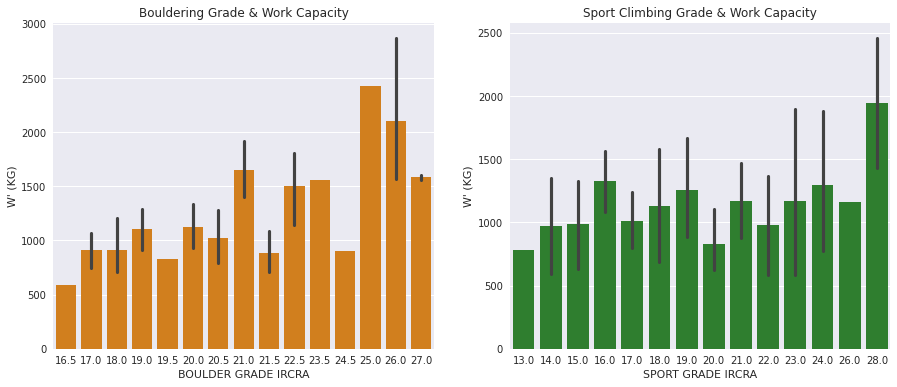

In [32]:
fig, (ax7,ax8) = plt.subplots(1, 2, figsize=(15 , 6))


ax5 = sns.barplot(ax = ax7,data=dataframe, x="BOULDER GRADE IRCRA", y="W' (KG)",color='#EF8200')
ax5.title.set_text('Bouldering Grade & Work Capacity')

ax6 = sns.barplot(ax = ax8,data=dataframe, x="SPORT GRADE IRCRA", y="W' (KG)",color='forestgreen')
ax6.title.set_text('Sport Climbing Grade & Work Capacity')

### CF % body mass, cf% peak force vs grade lineplot/jointplot?
this is prob useless



Text(0.5, 1.0, 'CF % BODY MASS, CF % PEAK FORCE versus Bouldering Grade')

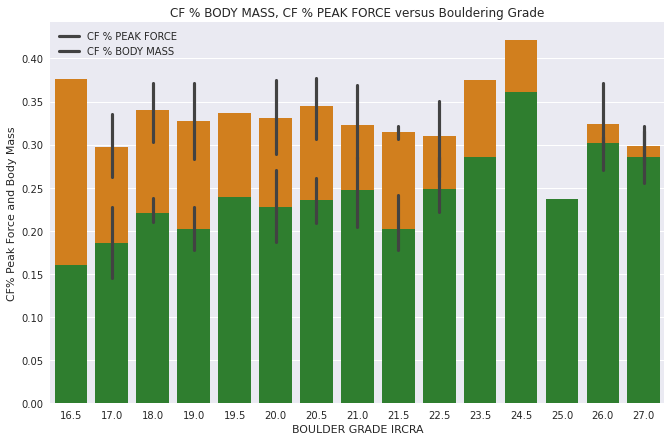

In [33]:
fig, ax9 = plt.subplots(figsize=(11 ,7),)

ax9=sns.barplot(data = dataframe, x="BOULDER GRADE IRCRA", y="CF % PEAK FORCE",color='#EF8200')
ax9=sns.barplot(data = dataframe, x="BOULDER GRADE IRCRA", y="CF % BODY MASS",color='forestgreen')

plt.ylabel('CF% Peak Force and Body Mass')
plt.legend(["CF % PEAK FORCE","CF % BODY MASS"])
plt.title ('CF % BODY MASS, CF % PEAK FORCE versus Bouldering Grade')
